# Machine Learning and Statistics: Tasks

Author: Daria Sep

***

## Task 1

### Description

***

Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such
as `math`. In this task, you should write a function `sqrt(x)` to approximate the square root of a floating point number `x` without
using the power operator or a package.

Rather, you should use the Newton’s method. Start with an initial guess for the square root called $z_0$. You then repeatedly
improve it using the following formula, until the difference between some previous guess $z_i$ and the next $z_{i+1}$ is less than some threshold, say 0.01

$$ z_{i+1} = z_i - \frac{z_i*z_i - x}{2z_i} $$

### Solution

***

In [1]:
def sqrt(x):
    # Initial guess for the square root
    z = x / 2.0
    # Defining the threshold for convergence
    threshold = 0.01
    
    while True:
        # Calculating the next approximation using Newton's method formula
        z_next = z - (z * z - x) / (2 * z)
        
        # Checking if the difference between the current and next approximation is less than the threshold
        if abs(z_next - z) < threshold:
            break
        
        # Updating the current approximation
        z = z_next
    
    return z

### Tests

***

In [2]:
# Test the function on 101
x = 101.0
result = sqrt(x)
print(f"The square root of {x} is approximately {result}, rounded to 2 decimal points is {result:.2f}")

The square root of 101.0 is approximately 10.049925395190327, rounded to 2 decimal points is 10.05


In [3]:
# Test the function on 13
x = 13
result = sqrt(x)
print(f"The square root of {x} is approximately {result}, rounded to 2 decimal points is {result:.2f}")

The square root of 13 is approximately 3.6058779145461, rounded to 2 decimal points is 3.61


In [4]:
# Test the function on 24
x = 24
result = sqrt(x)
print(f"The square root of {x} is approximately {result}, rounded to 2 decimal points is {result:.2f}")

The square root of 24 is approximately 4.908512720156556, rounded to 2 decimal points is 4.91


### Notes

The provided code defines a Python function called `sqrt(x)` that calculates the square root of a given number `x` using the Newton's method for finding square roots. It iteratively refines an initial guess until it reaches to a value that is within the specified threshold of accuracy. It's a numerical approximation technique commonly used in mathematics and engineering.

1. Function `sqrt(x)` that takes an argument `x` is defined.
2. A variable `z` is defined to half of `x` as the initial guess for the square root.
3. A `threshold` of `0.01` is set to determine when the approximation is considered sufficiently close to the actual square root.
4. A `while` loop is entered until the desired level of accuracy is achieved.
5. The next approximation is calculated using the Newton's method formula. The `z_next` is updated based on the current approximation `z` and the input value `x`.
6. If the difference is below `threshold`, the loop breaks, otherwise, `z` is updated to the value of `z_next` for the next iteration of the loop.
7. The final approximation is returned as the square root of `x`.

### References

***

Agrawal U. (2022). *Find root of a number using Newton’s method.* Available online at <https://www.geeksforgeeks.org/find-root-of-a-number-using-newtons-method/>

Markdown Guide (n.d.). *Basic Syntax - The Markdown elements outlined in the original design document.* Available online at <https://www.markdownguide.org/basic-syntax/#overview>

Strang G., Herman E. (2016). *Newton’s Method. Calculus Volume 1.* Available online at <https://math.libretexts.org/Bookshelves/Calculus/Calculus_(OpenStax)/04%3A_Applications_of_Derivatives/4.09%3A_Newtons_Method>

***

## Task 2

### Description

***

Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they
prefer plain or chocolate biscuits. Use `scipy.stats` to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.

| Drink/Biscuit| Chocolate | Plain |
| :----: | :----: | :----: |
| Coffee | 43 | 57 |
| Tea | 56 | 45 |

### Solution

***

#### Imports

In [5]:
# Dataframes
import pandas as pd

# Shuffles
import random

# Statistics
import scipy.stats as ss 

#### Data

In [6]:
coffee_chocolate = [['Coffee', 'Chocolate']] * 43
tea_chocolate = [['Tea', 'Chocolate']] * 56
coffee_plain = [['Coffee', 'Plain']] * 57
tea_plain = [['Tea', 'Plain']] * 45

# Merging four lists
raw_data = coffee_chocolate + coffee_plain + tea_chocolate + tea_plain

# Shuffling the data
random.shuffle(raw_data)

# Zipping the list
drink, biscuit = list(zip(*raw_data))

# Creating a dataframe
df = pd.DataFrame({'drink': drink, 'biscuit': biscuit})

df

,drink,biscuit
0,Tea,Plain
1,Coffee,Plain
2,Coffee,Plain
3,Coffee,Plain
4,Tea,Chocolate
...,...,...
196,Coffee,Plain
197,Tea,Chocolate
198,Coffee,Plain
199,Tea,Plain


#### Contingency table

In [7]:
cross = ss.contingency.crosstab(df['drink'], df['biscuit'])
cross

CrosstabResult(elements=(array(['Coffee', 'Tea'], dtype=object), array(['Chocolate', 'Plain'], dtype=object)), count=array([[43, 57],
       [56, 45]]))

In [8]:
cross.count

array([[43, 57],
       [56, 45]])

#### Chi Square Test

In [9]:
chi2, p, dof, expected = ss.chi2_contingency(cross.count, correction=False)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)


Chi-Square Statistic: 3.113937364324669
P-value: 0.07762509678333357
Degrees of Freedom: 1
Expected Frequencies Table:
[[49.25373134 50.74626866]
 [49.74626866 51.25373134]]


#### Interpretation

In [10]:
# H0 (null hypothesis) states that there is no relation between the variables. 

alpha = 0.05
print("P-value is " + str(p))


if p <= alpha:
    print('Dependent (reject H0) - There is a significant association between "drink" and "biscuit".')
else:
    print('Independent (H0 holds true) - There is no significant association between "drink" and "biscuit".')

P-value is 0.07762509678333357
Independent (H0 holds true) - There is no significant association between "drink" and "biscuit".


### Notes

***

1. Four lists (`coffee_chocolate`, `tea_chocolate`, `coffee_plain`, and `tea_plain`) are created, each containing pairs of "drink" and "biscuit" values, indicating frequencies.
2. These four lists are merged into a single list called `raw_data`.
3. The order of elements in the `raw_data` list is shuffled using `random.shuffle(raw_data)`, effectively randomizing the dataset.
4. The `zip(*raw_data)` operation splits the pairs of "drink" and "biscuit" into two separate lists.
5. A pandas DataFrame `df` is created using these two lists, where "drink" and "biscuit" become columns in the DataFrame.
6. A contingency table `cross` is created using `ss.contingency.crosstab()` to count the occurrences of different combinations of "drink" and "biscuit" in the DataFrame.
7. Chi-Square test is performed on the contingency table and the test statistics, p-value, degrees of freedom, and expected frequencies are printed.
8. The significance level (`alpha`) is set to 0.05. 
9. The `p-value` is compared with `alpha` to determine whether there's a significant association between "drink" and "biscuit".
10. The interpretation of the Chi-Square test results is printed, indicating the independence between "drink" and "biscuit."

### References

***
Brownlee J. (2019). *A Gentle Introduction to the Chi-Squared Test for Machine Learning.* Available online at <https://machinelearningmastery.com/chi-squared-test-for-machine-learning/>

GeeksForGeeks (n.d.). *Python – Pearson’s Chi-Square Test.* Available online at <https://www.geeksforgeeks.org/python-pearsons-chi-square-test/>

Markdown Guide (n.d.). *Extended Syntax - Advanced features that build on the basic Markdown syntax.* Available online at <https://www.markdownguide.org/extended-syntax/#markdown-processors>

McLoughlin I. (2023). *Topic 2: Chi-Square Tests* Online at: <https://vlegalwaymayo.atu.ie/course/view.php?id=8770#coursecontentcollapse3>

Mulani S. (2021). *Chi-square test in Python — All you need to know!!* Available online at <https://www.askpython.com/python/examples/chi-square-test>

***

## Task 3

### Description

***

Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.

### Solution

***

#### Imports

In [29]:
# Data frames
import pandas as pd

# Statistics
import scipy.stats as ss

# Plots
import matplotlib.pyplot as plt

#### Data

In [30]:
# Loading the penguins dataset into a DataFrame
penguins_df = pd.read_csv("csv/penguins.csv")

# Showing data
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [31]:
# Filtering the dataset for Gentoo penguins only
gentoo_df = penguins_df[penguins_df["species"] == "Gentoo"]

# Splitting the data into male and female groups
male_mass = gentoo_df[gentoo_df["sex"] == "MALE"]["body_mass_g"]
female_mass = gentoo_df[gentoo_df["sex"] == "FEMALE"]["body_mass_g"]

male_mass.head(), female_mass.head()

(221    5700.0
 223    5700.0
 224    5400.0
 227    5200.0
 229    5150.0
 Name: body_mass_g, dtype: float64,
 220    4500.0
 222    4450.0
 225    4550.0
 226    4800.0
 228    4400.0
 Name: body_mass_g, dtype: float64)

#### Histogram

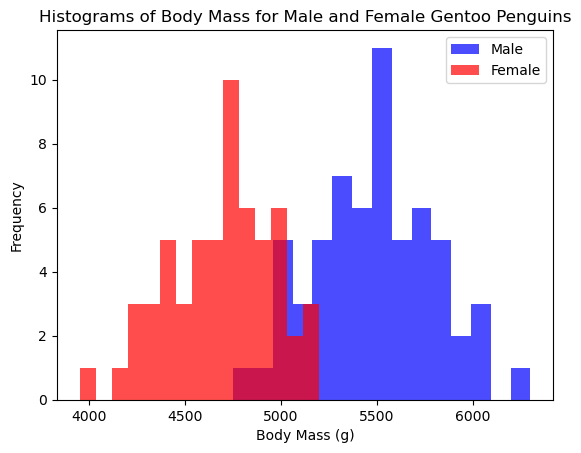

In [33]:
plt.hist(male_mass, bins=15, alpha=0.7, color="blue", label="Male")
plt.hist(female_mass, bins=15, alpha=0.7, color="red", label="Female")

plt.xlabel("Body Mass (g)")
plt.ylabel("Frequency")
plt.title("Histograms of Body Mass for Male and Female Gentoo Penguins")
plt.legend()
plt.show()

#### T-test

In [21]:
# Performing a two-sample t-test
t_statistic, p_value = ss.ttest_ind(male_mass, female_mass)

# Defining the significance level 
alpha = 0.05

# Checking if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("There is significant evidence of a difference in body mass between male and female Gentoo penguins.")
else:
    print("There is no significant evidence of a difference in body mass between male and female Gentoo penguins.")

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")


There is significant evidence of a difference in body mass between male and female Gentoo penguins.
t-statistic: 14.721676481405709
p-value: 2.133687602018886e-28


### Notes

***

The code above Performs a t-test on the famous penguins dataset to investigate whether there is evidence of a significant difference in the body mass of male and female Gentoo penguins.

1. The penguins dataset is loaded from a CSV file named "penguins.csv" into a pandas DataFrame called `penguins_df`.
2. The dataset is filtered to include only Gentoo penguins. A new DataFrame called `gentoo_df` is created.
3. The data is split into male and female groups based on the "sex" column.
4. Histogram is generated to visualise the data. 
5. A two-sample t-test is performed using `ttest_ind` function from the `scipy.stats` library to compare the body mass of male and female Gentoo penguins. The function calculates the t-statistic and the p-value.
6. A significance level (alpha) is set to 0.05 and the p-value is checked against alpha to determine if there is a significant difference between male and female penguin body masses.

### References

***
Matplotlib (n.d). *matplotlib.pyplot.hist* Available online at: <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html>

McLoughlin I. (2023). *Topic 3: t-Tests* Online at: <https://vlegalwaymayo.atu.ie/course/view.php?id=8770#coursecontentcollapse4>

Mwaskom (2020). *seaborn-data: Data repository for seaborn examples.* Available online at <https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv>

SciPy Manual (n.d). *scipy.stats.ttest_ind* Available online at <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html>

Suleiman A. (2022). *How To Perform The 5 Most Popular Statistical Analysis With Python.*  Available online at <https://python.plainenglish.io/how-to-perform-the-5-most-popular-statistical-analysis-with-python-ce9012c3be30>

***

## Task 4

### Description

***

Using the famous iris data set, suggest whether the setosa class is easily separable from the other two classes. Provide evidence
for your answer.

### Solution

***

### Notes

***

### References

***

## Task 5

### Description

***

Perform Principal Component Analysis on the iris data set, reducing the number of dimensions to two. Explain the purpose
of the analysis and your results.

### Solution

***

### Notes

***

### References

***

***

## End